#**Curva de Phillips: Qué es y como llegar a ella trabajando con series temporales**

# **Preámbulo**

Este caso de uso enseña varias cosas así que puede tener una utilidad distinta según quién lo use. Se puede usar para:

1-Entender qué es la curva de Phillips y entender las críticas que recibió

2-Entender qué significa el que una variable sea estacionaria o no y que utilidad tiene

3-Aprender a comprobar la estacionalidad de una serie temporal en Python usando el "Augmented Dickey-Fuller test"

4-Aprender a usar la técnica de "coger diferencias" para volver estacionarias series temporales

5-Aprender a realizar un modelo OLS en Python y aprender a usar estos modelos para comprobar la relación entre dos variables

6-Aprender a coger muestras de series temporales en Python. Por ejemplo, coger el período 2002-2005 en una serie temporal que va desde 2002 hasta 2020

Si el lector solo busca uno de estos conceptos puede saltar directamente a través del índice a cualquiera de ellos y aprenderlo. Sin embargo, si se quiere profundizar en la evidencia empírica de la Curva de Phillips en España es recomendable leer todo el caso de uso de principio a final y en orden. 

Para sugerencias o dudas me podéis escribir a josemanuelclarosr@gmail.com



#**1-¿Qué es la Curva de Phillips?**

La curva de Phillips es un popular concepto macroeconómico que ha influido de manera decisiva en la mayoría de las políticas monetarias que ha habido a partir de la segunda mitad del siglo XX. 

En 1958, el economista A.W. Phillips publicó un artículo  donde demostró como existía una relación negativa entre la inflación y el desempleo en Reino Unido. Es decir, demostró que una tasa de alta de inflación reducia la tasa de paro y viceversa. 

El artículo fue un gran éxito y posteriormente investigadores como Solow lo demostraron para otros países. En poco tiempo paso de ser un concepto académico a ser la guía con la que diseñaban sus políticas bancos centrales y gobiernos de todo el mundo. 

##**1.1-¿Por qué inflación y paro están relacionados?**

La lógica es sencilla, que disminuya la tasa de desempleo de un país significa que hay más gente trabajando y por tanto más gente ganando más. Como la gente tiene más dinero, esta lo gasta en más productos lo que aumenta la demanda. Y al aumentar la demanda aumentan los precios. 

Es decir, para Phillips una de las causas primarias de que exista inflación es que hay más gente empleada y, por tanto, para evitar que haya inflación hay que ralentizar la tasa de creación de empleo. Dicho de otra manera, esta teoría plantea que los gobiernos **tienen que elegir entre inflación y empleo.**



##**1.2-Caso de uso: Buscar evidencia empírica de la Curva de Phillips en España**

Ahora busquemos si esta relación que encontraron los economistas del siglo XX se reproduce en España en el siglo XXI. He usado un dataset de la inflación y el desempleo en España entre los años 2002 y 2021. Los datos los he cogido del INE.

Lo primero que haremos será importar las librerías que necesitaremos para trabajar y el excel donde esta el dataset.

In [2]:
#Importamos las siguientes librerias para poder empezar a trabajar con los datos que tenemos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Importamos el archivo Excel que tenemos a nuestro escritorio de Python
from google.colab import files
uploaded=files.upload()

#Visualizamos el archivo Excel para asegurarnos de que todo este correcto
datos=pd.read_excel('Curva de Philips 2002-2021 Prueba.xlsx')
datos.head()


Saving Curva de Philips 2002-2021 Prueba.xlsx to Curva de Philips 2002-2021 Prueba.xlsx


,Trimestre,Paro,Promedio variación IPC mensual
0,2021T4,13.33,0.011000
1,2021T3,14.57,0.009667
2,2021T2,15.26,0.010333
3,2021T1,15.98,0.001667
4,2020T4,16.13,0.000667


Tras importar las series temporales y las librerias y asegurarnos de que todo esta bien, las renombramos como variables.

In [3]:
#Cogemos las dos series temporales y las volvemos las variables "Inflación" y "Paro"
Inflación=datos['Promedio variación IPC mensual']
Paro=datos['Paro']

#Cogemos la escala temporal en la que estan y la volvemos una variable para poder graficar
Tiempo=datos['Trimestre']






Hecho esto, logaritmizamos la variable "Paro" para que también este en porcentajes, ya que la variable "Inflación" ya lo está.

In [6]:
ln_paro=np.log(Paro)

Hecho esto hacemos un gráfico de dispersión para comprobar si hay alguna relación entre estas variables.

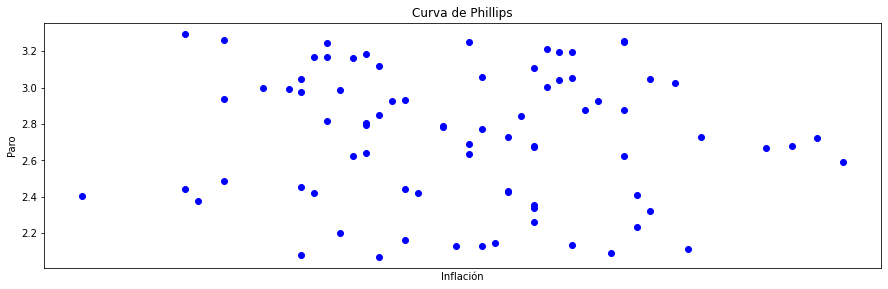

In [7]:
fig,(ax0)=plt.subplots(1,1)
plt.gcf().autofmt_xdate()
plt.xticks(np.arange(1,240,step=3))

ax0.plot(Inflación,ln_paro,'o',color='blue')
ax0.set_title('Curva de Phillips')
ax0.set_xlabel('Inflación')
ax0.set_ylabel('Paro')

fig.set_figheight(5)
fig.set_figwidth(15)

Como podemos ver en el gráfico de dispersión, no parece haber relación alguna entre inflación y desempleo en España. Sin embargo, esta primera comprobación visual no es suficiente para sacar ninguna conclusión seria. 

Para poder asegurar que no encontramos relación entre estas dos series temporales debemos hacer una **regresión** y para ello tenemos que asegurarnos de que son **series estacionarias.**

#**2-Qué es la estacionalidad, como testarla y como lograr estacionalizar una serie temporal**

##**2.1-¿Qué significa que una serie temporal sea estacionaria?**

De manera intuitiva, decimos que una serie ***no*** es estacionaria cuando esta posee una tendencia o su comportamiento varía con el tiempo.

De manera matemática, decimos que una serie ***no*** es estacionaria si su media o varianza ***no*** son constantes.


##**2.2-Ejemplo de serie no estacionaria vs serie estacionaria**

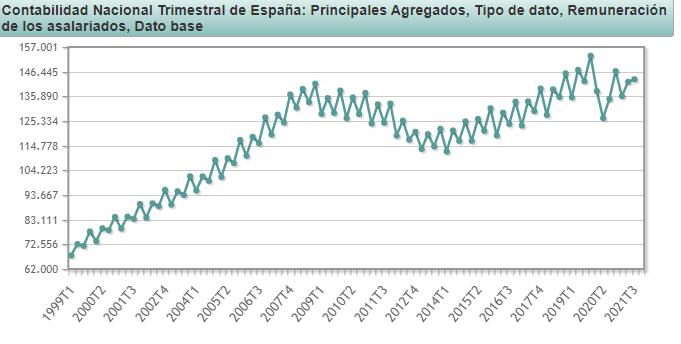
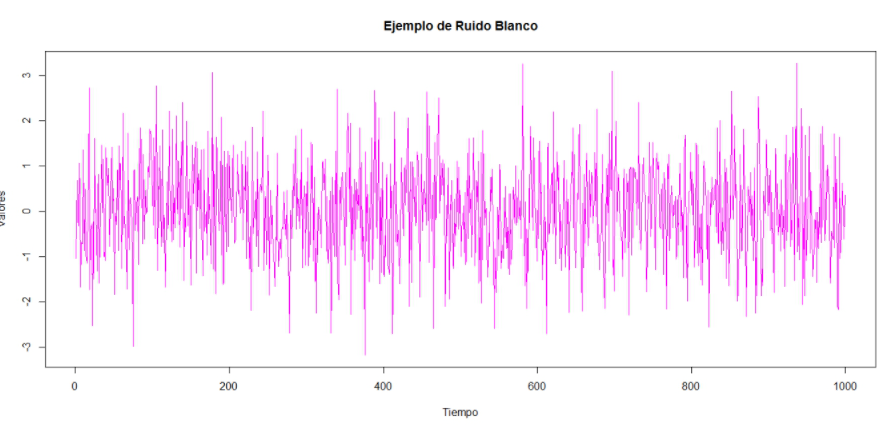

Ilustraremos esto con las dos series de arriba. En la primera serie (nivel de salarios) se puede apreciar que existe una clara tendencia creciente y que existen períodos donde el comportamiento de la variable cambia. Sin embargo, en el segundo gráfico (ejemplo de ruido blanco) vemos como no existe tendencia y, si bien hay momentos donde el movimiento de la variable es más pronunciado que en otros, en general la varianza es siempre la misma. 

Por tanto, decimos que la primera variable es no estacionaria y la segunda es estacionaria.

##**2.3-¿Por qué importa el que una serie temporal sea estacionaria o no?**

En ocasiones, dos series temporales poseen tendencias paralelas a pesar de que no haya una conexión lógica entre ambas. 

El mejor ejemplo es el que puso el físico Bobby Henderson, quién encontro que el cambio climático estaba correlacionado con el número de piratas en el mundo. Esta relación se da porque mientras que las temperaturas globales llevan siguiendo una tendencia creciente desde hace siglos, el número de piratas lleva siguiendo una tendencia decreciente desde hace siglos. Esto hace que estas dos variables esten correlacionadas matemáticamente de manera negativa aunque no haya ninguna conexión lógica entre ambas. Es lo que llamamos **una correlación espuria**.

Por ello, cuando trabajamos con series temporales, es muy importante librarse de la tendencia para evitar que se den este tipo de correlaciones. Es decir, es muy importante que las series temporales con las que trabajes sean **estacionarias**.


##**2.3-Comprobación visual**

Cuando estamos analizando si una serie es estacionaria o no, lo primero que hacemos siempre es graficar cada serie temporal de manera individual ya que, en muchas ocasionas, la media varía tanto que con un solo vistazo a la gráfica podemos decir si la variable es estacionaria o no.

Vamos a ejemplificarlo con "Paro".

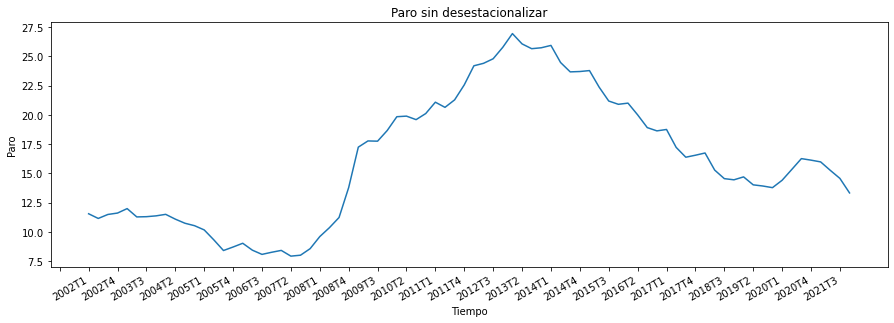

In [8]:
fig, (ax1)=plt.subplots(1,1)
plt.gcf().autofmt_xdate() #para que las fechas salgan inclinadas y no horizontal
plt.xticks(np.arange(1, 240, step= 3)) #para que no salgan todas las fechas juntas amontonadas

ax1.plot(datos.Trimestre,datos.Paro)
ax1.set_title('Paro sin desestacionalizar')
ax1.set_xlabel('Tiempo')
ax1.set_ylabel('Paro')

ax1.invert_xaxis()


fig.set_figheight(5)
fig.set_figwidth(15)
fig.show()


Como podemos  ver, la serie es claramente **no** estacionaria ya que su media varía continuamente. Así que mas adelante la volveremos estacionaria en la sección **"Como volver estacionaria una variable"**. Ahora pasaremos a comprobar como se comporta la inflación.

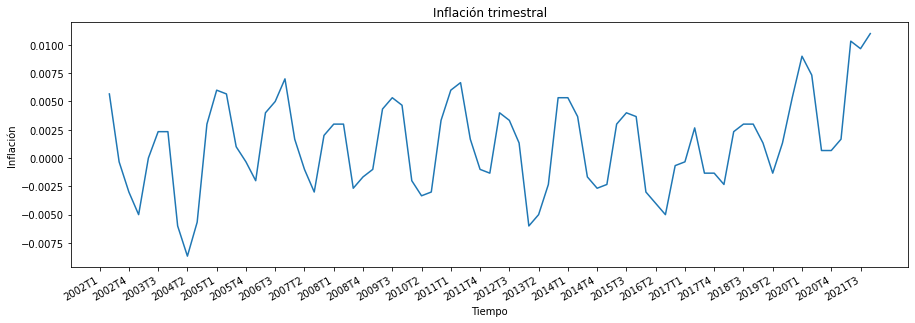

In [9]:
fig,(ax2)=plt.subplots(1,1)
plt.gcf().autofmt_xdate() 
plt.xticks(np.arange(1, 240, step= 3)) 

ax2.plot(Tiempo,Inflación)
ax2.set_title('Inflación trimestral')
ax2.set_xlabel('Tiempo')
ax2.set_ylabel('Inflación')

ax2.invert_xaxis()

fig.set_figheight(5)
fig.set_figwidth(15)

Como podemos comprobar, la inflación si que parece tener una media constante. Sin embargo, hay puntos de la gráfica donde si que parece que la media se desvía significativamente así que para asegurarnos de que la variable es estacionaria tendremos que correr un **test de Dickey-Fuller**

##**2.4-Comprobación a través del "Augmented Dickey-Fuller test"**

Este test se usa para comprobar si una serie temporal es estacionaria o no. 

Su intuición general es que es un contraste de hipótesis donde la hipótesis nula es que la serie no es estacionaria. 

Al correr el test, este siempre nos da un estadístico negativo y, si este es mas bajo que los valores críticos, rechazamos la hipótesis nula y concluimos que la serie es estacionaria.  



In [10]:
#Primero importamos la librería necesaria para correr este test
from statsmodels.tsa.stattools import adfuller

In [11]:
#Después nos aseguramos de quitar todos los valores nulos de la serie ya que si no el test no es capaz de leer la variable
Inflación=Inflación[~np.isnan(Inflación)]

Tras preparar la variable para el test, lo ejecutamos

In [12]:
dftest=adfuller(Inflación,autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test statistic','p-value','#lags used','number of observations used'])
for key,value in dftest[4].items():
  dfoutput['critical value(%s)'%key]=value
print(dfoutput)

Test statistic                 -3.165976
p-value                         0.022041
#lags used                     10.000000
number of observations used    68.000000
critical value(1%)             -3.530399
critical value(5%)             -2.905087
critical value(10%)            -2.590001
dtype: float64


Como podemos ver, el estadístico (-3.16) es más pequeño que los valores críticos al 10% (-2.59) y al 5% de significación (-2.9), pero es más grande que el valor crítico al 1% de significación (-3.53). 

Esto significa que si pusieramos un 1% de significación, diríamos que la serie no es estacionaria, pero si usaramos niveles de significación iguales o superiores al 5% diríamos que la serie es estacionaria.

Como en investigación se suele trabajar con un 5% de significación, nosotros vamos a hacer lo mismo y por tanto vamos a concluir que la serie es estacionaria.

##**2.5-Como volver estacionaria una serie temporal**

El método que más comunmente se usa es el de tomar diferencias. 

Este método consiste en restar cada punto de la serie con su punto anterior. Matemáticamente seria:

  $$dif=x_{t}-x_{t-1}$$

Por ejemplo, si tenemos una serie temporal con frecuencia anual que va desde 2022 hacia atrás, para difereciar la serie tendríamos que restar el dato de 2022 con el de 2021, el de 2021 con el de 2020 y así sucesivamente. 

Hacemos esto porque al restar cada dato con su anterior, si existe una tendencia que una a ambas variables esta se eliminara restandolas. Por ejemplo, si llamamos t a la tendecia:

  $$x_{t}=t+y_{t}$$

  $$x_{t-1}=t+y_{t-1}$$
  
  $$x_{t}-x_{t-1}=y_{t}-y_{t-1}$$


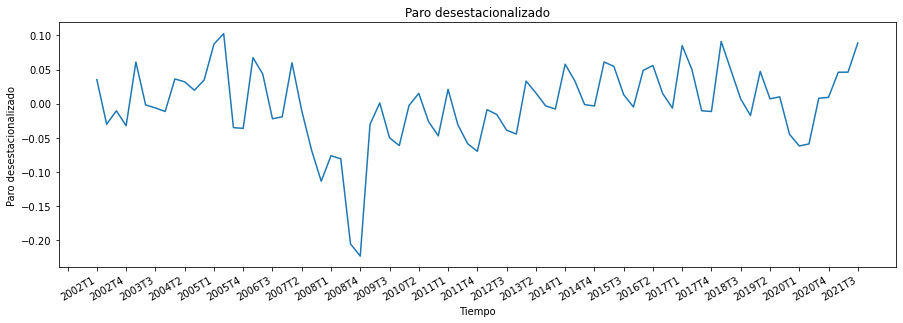

In [13]:
#Diferenciamos la serie temporal de "Paro"
df_Paro=ln_paro.diff()

#Lo gráficamos para hacer una comprobación visual
fig,(ax3)=plt.subplots(1,1)
plt.gcf().autofmt_xdate() 
plt.xticks(np.arange(1, 240, step= 3)) 

ax3.plot(Tiempo,df_Paro)
ax3.set_title('Paro desestacionalizado')
ax3.set_xlabel('Tiempo')
ax3.set_ylabel('Paro desestacionalizado')

ax3.invert_xaxis()

fig.set_figheight(5)
fig.set_figwidth(15)


Como podemos ver, la serie ahora si que tiene una forma más estacionaria aunque hay puntos como 2008 que nos hacen dudar así que corremos un "Augmented Dickey-Fuller test"

In [14]:
#Primero nos aseguramos de quitar los valores nulos de la serie para correr el test
df_Paro=df_Paro[~np.isnan(df_Paro)]

#Hacemos el test
dftest=adfuller(df_Paro, autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test statistic','p-value','#lags used','number of observations used']) 
for key,value in dftest[4].items():
  dfoutput['critical value(%s)' %key]=value 
print(dfoutput)




Test statistic                 -3.095534
p-value                         0.026885
#lags used                      4.000000
number of observations used    74.000000
critical value(1%)             -3.521980
critical value(5%)             -2.901470
critical value(10%)            -2.588072
dtype: float64


De manera parecida a lo que nos ha pasado con la serie "Inflación", al 1% diríamos que la serie no es estacionaria, pero al 5% y al 10% diríamos que es estacionaria.

Ahora imaginemos que estamos trabajando con un 1% de significación. En este caso tomar las primeras diferencias no nos sirve, así que tenemos que volver a diferenciar.

En series temporales, se pueden tomar diferencias varias veces hasta lograr que la variable sea estacionaria, aunque existen ciertos riesgos de sobrediferenciación que no vamos a tratar aquí. Por ello es conveniente tomar diferencias solo hasta que podamos decir que es estacionaria a un nivel de confianza razonable como el 10% o el 5%.

In [13]:
#Tomamos la segunda diferencia de la variable
df2_paro=df_Paro.diff()

#Limpiamos la serie de valores nulos
df2_paro=df2_paro[~np.isnan(df2_paro)]

#Corremos el test
dftest=adfuller(df2_paro, autolag='AIC')
dfoutput=pd.Series(dftest[0:4], index=['Test statistic','p-value', '#lags used', 'number of observations used'])
for key,value in dftest[4].items():
  dfoutput['critical value(%s)' %key]=value
print(dfoutput)


Test statistic                 -3.967347
p-value                         0.001591
#lags used                      3.000000
number of observations used    74.000000
critical value(1%)             -3.521980
critical value(5%)             -2.901470
critical value(10%)            -2.588072
dtype: float64


Como vemos, la variable ahora si que es estacionaria al 1% de significación

#**3-Evidencia de la curva de Phillips**

Una vez ya trabajadas las variables, podemos intentar averiguar si existe alguna relación entre ellas. Usaremos la serie de inflación sin diferenciar y la serie "Paro" diferenciada una sola vez (ya que con una sola diferencia nos basta para que sea estacionaria al 5%). Para hacer esta comprobación usaremos un modelo OLS (i.e una regresión) 

##**3.1-Breve explicación de como usar el modelo OLS para testar si hay relación entre dos variables**

Cuando trabajamos con series temporales, solemos testar si existe relación entre ellas usando el modelo OLS.

En pocas palabras, consiste en crear un modelo donde tienes una variable que depende de otra. En nuestro caso vamos a hacer que inflación dependa de paro.

En este modelo que vamos a hacer, nos va a salir un coeficiente acompañado de paro que es lo que varia inflación según lo que varía paro. Gráficamente:

$$Inflacion=B_{0}+B_{1}*Paro$$

Si este coeficiente (B1) es 0, significa que no existe relación alguna entre estas variables

In [15]:
import statsmodels.api as sm #Para hacer regresiones necesitamos importar esta librería

#Este es el código para poder hacer la regresión
est=sm.OLS(Inflación,df_Paro.values.reshape(-1,1))
est=est.fit()

print(est.summary())


                                       OLS Regression Results                                      
Dep. Variable:     Promedio variación IPC mensual   R-squared (uncentered):                   0.017
Model:                                        OLS   Adj. R-squared (uncentered):              0.004
Method:                             Least Squares   F-statistic:                              1.324
Date:                            Tue, 01 Mar 2022   Prob (F-statistic):                       0.253
Time:                                    08:38:53   Log-Likelihood:                          319.85
No. Observations:                              79   AIC:                                     -637.7
Df Residuals:                                  78   BIC:                                     -635.3
Df Model:                                       1                                                  
Covariance Type:                        nonrobust                                                  


En esta entrada enorme que nos sale, lo único que realmente nos interesa es "p>|t|" que es lo que llamamos el p-valor. Si este es menor de 0.05, consideramos que es muy improbable que el coeficiente sea 0 y por tanto concluimos que existe relación entre las dos variables. Si es mayor, decimos que hay una probabilidad razonable de que sea 0 y por tanto concluimos que no existe relación alguna. 

En este caso, el p-valor es de 0.25 así que concluimos que no existe relación entre inflación y desempleo. Lo cuál, desmiente la Curva de Phillips.

Visualmente también lo podemos comprobar

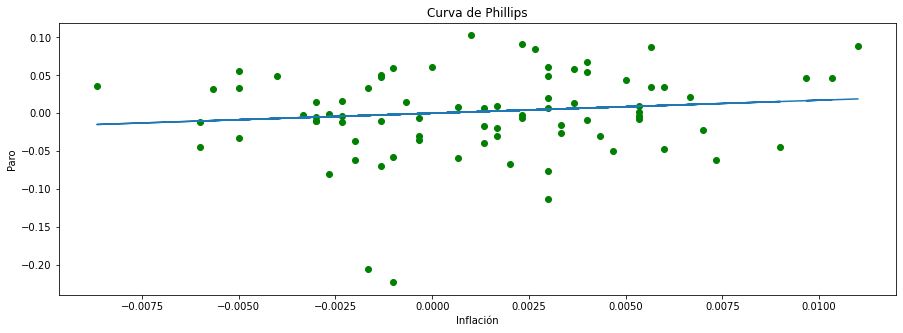

In [18]:
fig,(ax6)=plt.subplots(1,1)
ax6.plot(Inflación, df_Paro, 'o',color='green')
ax6.set_title('Curva de Phillips')
ax6.set_xlabel('Inflación')
ax6.set_ylabel('Paro')
ax6.plot(Inflación,est.predict(Inflación.values.reshape(-1,1)))

fig.set_figwidth(15)
fig.set_figheight(5)


#**4-¿Por qué no encontramos evidencia de la curva de Phillips? La crítica de Friedman**

Como acabamos de ver, no existe evidencia de que esta relación que fue demostrada en los años 60 exista en España. Esto no es sorprendente ya que en 1970 ocurrio un hecho que vino a desmentir la teoría que Phillips había creado 12 años antes.

A principios de esta década, una serie de eventos como la guerra del Yom Kippur y el consiguiente bloqueo del petróleo de los países árabes llevaron a un período de alta inflación en Estados Unidos. En teoría, la tasa de desempleo americana debería de haberse situado en niveles históricamente bajos pero esta se mantuvo estable e incluso subió. Fue el comienzo de lo que se vino a llamar **estanflación**.

Aunque para la mayoría de economistas esto supuso una gran sorpresa, no fue así para algunos académicos como Friedman o Phelps. Unos años antes, en contra del pensamiento de su época, habían predicho que más tarde o más temprano esta relación desaparecería ya que, para ellos, en el largo plazo la relación entre estas variables es nula.

Basandose en **la teoría de las expectativas racionales**, dijeron que si hay inflación por mucho tiempo, la gente termina creyendo que un futuro seguirá habiendo inflación. Entonces incluirán en contratos o negociaciones salariales una clausula de aumento por la futira inflación. Dicho de otra manera, como creen que en el año que viene volverán a subir los precios, los agentes económicos se previenen negociando una subida futura de precios o salarios para no perder poder adquisitivo.

Esto implica que, eventualmente, los precios (debido a estas expectativas de la población) subirán al año siguiente sin que el empleo haya jugado un papel relevante. Es decir, la relación entre desempleo e inflación se habrá difuminado.

#**5-Conclusión**

La curva de Phillips es uno los conceptos académicos más discutidos dentro de la economía. El caso de uso que hemos expuesto aquí es la interpretación más simple de la misma. 

Hay multitud de investigadores que realizan curvas de Phillips ampliadas con más variables como, por ejemplo, la inflación esperada y que sí han encontrado evidencia empírica de la misma con estos modelos. 

No hay un consenso al respecto y por eso puede ser tan fascinante intentar profundizar en este concepto tan importante para la economía en trabajos o tesis.


#**6-Contenido extra: Como coger una muestra de serie temporal y trabajar con ella**

Para completar nuestro trabajo empírico, conviene realizar una regresión excluyendo datos atípicos como la crisis del 2008 o la crisis del Covid. Por ello, vamos a coger una muestra que va a ir desde 2002T2 hasta 2007T4 

In [4]:
st1=Tiempo[56:79]#Cogemos la mmuestra de tiempo
sp1=Paro[56:79]#Cogemos la muestra de paro
si1=Inflación[56:79]#Cogemos la muestra de inflación

#Comprobamos que hemos cogido la muestra correcta
print(st1)

56    2007T4
57    2007T3
58    2007T2
59    2007T1
60    2006T4
61    2006T3
62    2006T2
63    2006T1
64    2005T4
65    2005T3
66    2005T2
67    2005T1
68    2004T4
69    2004T3
70    2004T2
71    2004T1
72    2003T4
73    2003T3
74    2003T2
75    2003T1
76    2002T4
77    2002T3
78    2002T2
Name: Trimestre, dtype: object


Hacemos el test de "Augmented Dickey-Fuller" para asegurarnos de que estas series sean estacionarias.

In [84]:
dftest=adfuller(si1,autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test statistic','p-value','#lags used','Number of observations used'])
for key,value in dftest[4].items():
  dfoutput['critical value(%s)' %key]=value

print(dfoutput)

Test statistic                 -3.831914
p-value                         0.002597
#lags used                      8.000000
Number of observations used    14.000000
critical value(1%)             -4.012034
critical value(5%)             -3.104184
critical value(10%)            -2.690987
dtype: float64


La muestra de inflación es estacionaria al 5%.

In [85]:
dftest=adfuller(sp1,autolag='AIC')
dfoutput=pd.Series(dftest[0:4],index=['Test statistic','p-value','#lags used','Number of observations used'])
for key, value in dftest[4].items():
  dfoutput['critical value(%s)' %key]=value

print(dfoutput)

Test statistic                 -4.242839
p-value                         0.000557
#lags used                      9.000000
Number of observations used    13.000000
critical value(1%)             -4.068854
critical value(5%)             -3.127149
critical value(10%)            -2.701730
dtype: float64


La muestra de paro es estacionaria al 1%. Comprobado esto realizamos el modelo OLS.

In [16]:
est2=sm.OLS(si1,sp1.values.reshape(-1,1))
est2=est2.fit()

print(est2.summary())

                                       OLS Regression Results                                      
Dep. Variable:     Promedio variación IPC mensual   R-squared (uncentered):                   0.003
Model:                                        OLS   Adj. R-squared (uncentered):             -0.042
Method:                             Least Squares   F-statistic:                            0.07253
Date:                            Tue, 01 Mar 2022   Prob (F-statistic):                       0.790
Time:                                    08:39:12   Log-Likelihood:                          93.172
No. Observations:                              23   AIC:                                     -184.3
Df Residuals:                                  22   BIC:                                     -183.2
Df Model:                                       1                                                  
Covariance Type:                        nonrobust                                                  


El p-valor es de 0.79 así que concluimos que no existe relación alguna entre esta variables en esta muestra.

#**Bibliografía**

"Principios de economía". Mankiw, G.

"The Phillips curve could be broken for good". The economist

"On the death of the Phillips curve: further evidence". Reichel, R.

"La relación inflación desempleo en la economía española (1964-98): Una interpretación". Gómez García, F. Usabiaga Ibáñez, C.



